In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [36]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [37]:
# 미세먼지 데이터 읽기
pm10_df = pd.read_csv("./Git/데이터/1. 종속변수/국내미세먼지농도.csv", index_col = 0, header = [0, 1])
pm25_df = pd.read_csv("./Git/데이터/1. 종속변수/국내초미세먼지농도.csv", index_col = 0, header = [0, 1])

In [38]:
# 기상 데이터 읽기
kr_df = pd.read_csv("./독립변수/국내기상데이터.csv", index_col = 0, header = [0, 1])

In [39]:
pm10_df

PM10                             
지역                  강원 강릉시 광주 북구  대전 중구 부산 해운대구 서울 서대문구
일시                                                     
2015-01-01 03:00:00   35.0  21.7   33.3    18.7    63.7
2015-01-01 06:00:00   45.3  21.0   61.3    19.0   113.3
2015-01-01 09:00:00   56.3  21.7   95.0    28.3   135.0
2015-01-01 12:00:00   68.7  41.0  124.0    53.5    85.0
2015-01-01 15:00:00   88.3  70.3   56.3    54.3    44.7
...                    ...   ...    ...     ...     ...
2024-05-19 09:00:00   22.0  24.7   17.3    23.3    18.0
2024-05-19 12:00:00   25.0  21.3   30.0    33.3    17.0
2024-05-19 15:00:00   45.3  14.0   19.0    36.7    18.3
2024-05-19 18:00:00   34.3  20.7   16.3    32.3    24.7
2024-05-19 21:00:00   35.7  20.0   11.7    36.3    17.7

[27415 rows x 5 columns]

In [40]:
kr_df.head()

강수량                                               ...  \
                      90  101  102  105  108  119  127  133  140  152  ...   
일시                                                                     ...   
2015-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 06:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 09:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 12:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 15:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                             풍향                                        \
                    (279, 60.0) (279, 90.0) (279, 120.0) (279, 150.0)   
일시                                                                      
2015-01-01 03:00:00           0           0            0            0   
2015-01-01 06:00:00           0           0            0            0   
2015-01-01 09:00:00           0           0            0            0   
2015-01-01 12:00:00           0           0            0            0   
2015-01-01 15:00:00           0           0            0            0   

                                                                         \
                    (279, 180.0) (279, 210.0) (279, 240.0) (279, 270.0)   
일시                                                                        
2015-01-01 03:00:00            0            0            0            0   
2015-01-01 06:00:00            0            0            0            0   
2015-01-01 09:00:00            0            0            0            0   
2015-01-01 12:00:00            0            0            0            0   
2015-01-01 15:00:00            0            0            0            0   

                                               
                    (279, 300.0) (279, 330.0)  
일시                                             
2015-01-01 03:00:00            1            0  
2015-01-01 06:00:00            1            0  
2015-01-01 09:00:00            1            0  
2015-01-01 12:00:00            1            0  
2015-01-01 15:00:00            1            0  

[5 rows x 399 columns]

In [41]:
# 서울의 데이터만을 하나의 데이터프레임으로 생성
seoul_df = kr_df.xs("108", axis = 1, level = 1)

In [42]:
# 서울의 풍향 데이터 생성
seoul_wd = kr_df.iloc[:, -180:-168]

In [43]:
seoul_wd.columns = range(0, 360, 30)

In [44]:
seoul_wd = seoul_wd.idxmax(axis = 1)

In [45]:
seoul_df = pd.concat([seoul_df, seoul_wd], axis = 1)

In [48]:
seoul_df.columns = ['강수량', '기온', '습도', '이슬점온도', '증기압', '지면온도', '풍속', '해면기압', '현지기압', '풍향']

In [49]:
pm10_df[("PM10", "서울 서대문구")]

일시
2015-01-01 03:00:00     63.7
2015-01-01 06:00:00    113.3
2015-01-01 09:00:00    135.0
2015-01-01 12:00:00     85.0
2015-01-01 15:00:00     44.7
                       ...  
2024-05-19 09:00:00     18.0
2024-05-19 12:00:00     17.0
2024-05-19 15:00:00     18.3
2024-05-19 18:00:00     24.7
2024-05-19 21:00:00     17.7
Name: (PM10, 서울 서대문구), Length: 27415, dtype: float64

In [50]:
seoul_df = pd.concat([pm10_df[("PM10", "서울 서대문구")], seoul_df], axis = 1)

In [51]:
seoul_df.index = seoul_df.index.map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [52]:
# 각 월, 일, 시간 피처 생성
seoul_df["month"] = seoul_df.index.map(lambda x: x.month)
seoul_df["day"] = seoul_df.index.map(lambda x: x.day)
seoul_df["hour"] = seoul_df.index.map(lambda x: x.hour)

## 강수 여부에 따른 미세먼지 수치 분석

In [53]:
seoul_df["강수여부"] = seoul_df["강수량"] != 0

In [83]:
# 월별 / 강수 여부로 미세먼지 평균을 표현하는 데이터프레임 생성
perc_df = pd.concat([seoul_df[seoul_df["강수여부"] == False].groupby("month").mean().iloc[:, 0],
seoul_df[seoul_df["강수여부"] == True].groupby("month").mean().iloc[:, 0]], axis = 1)

In [84]:
perc_df.columns = ["False", "True"]

In [85]:
perc_df

,False,True
month,,
1,47.638928,33.669697
2,49.946889,27.285517
3,59.775706,32.388793
4,53.299315,25.552217
5,49.681737,22.493162
6,34.777680,22.019196
7,25.612062,15.851499
8,23.536069,13.395148
9,22.497275,13.466337


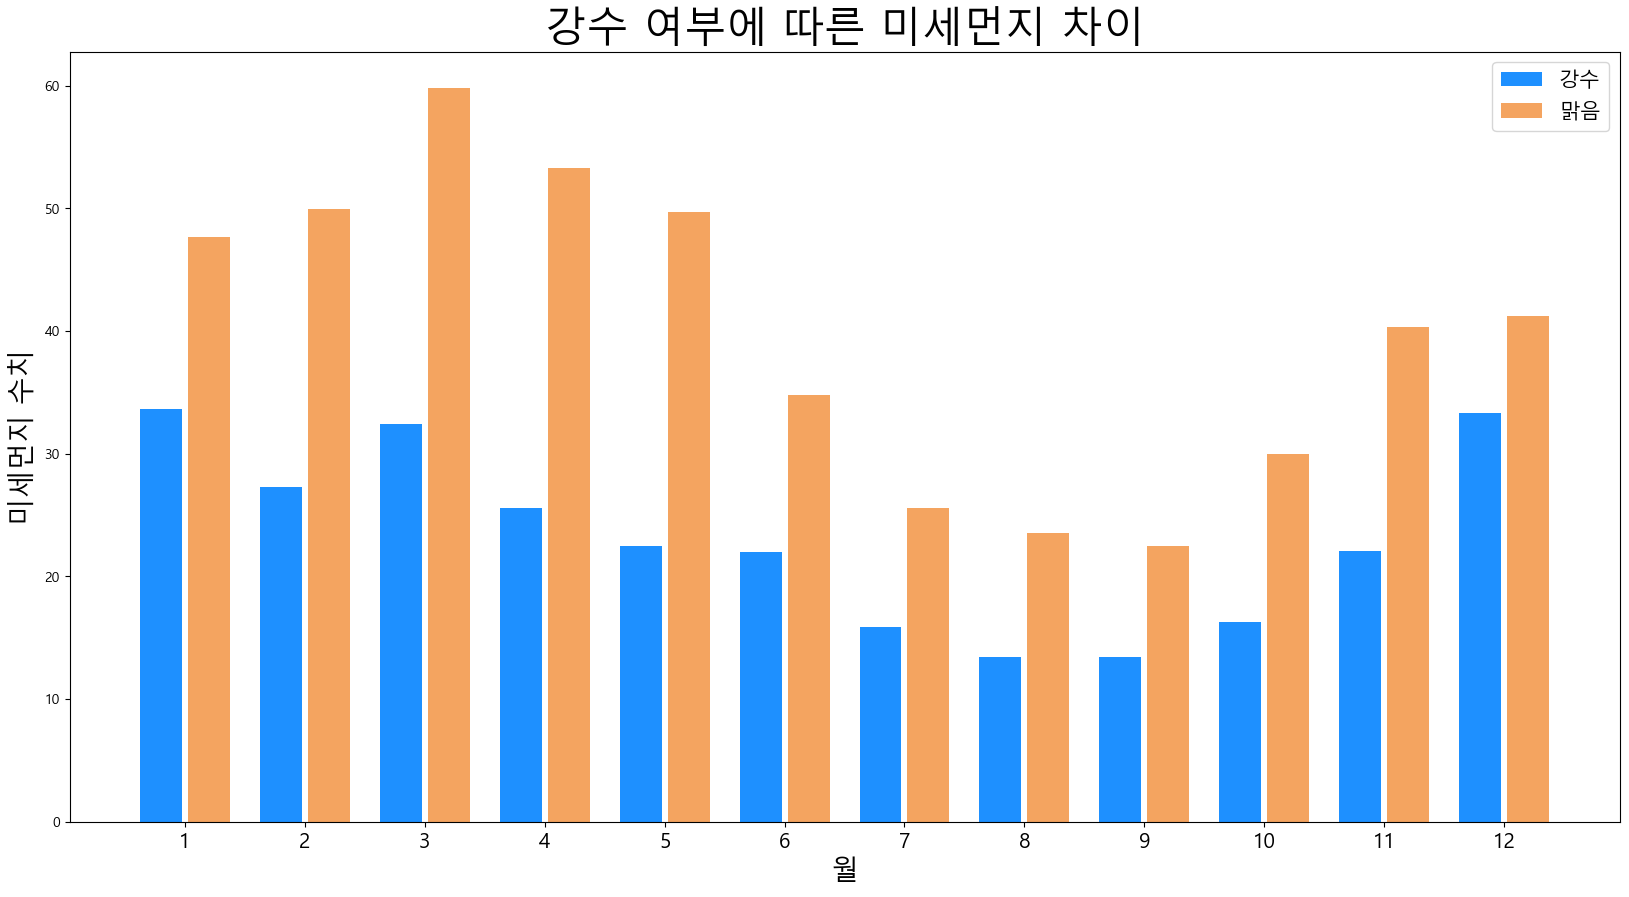

In [95]:
# X축 위치
x = np.arange(len(perc_df))

# 막대의 너비
bar_width = 0.35

# 플롯 초기화
fig, ax = plt.subplots(figsize=(20, 10))

# 첫 번째 데이터 (강수) 시각화
bars1 = ax.bar(x - bar_width/2 - 0.025, perc_df.iloc[:, 1], bar_width, label='강수', color='dodgerblue')

# 두 번째 데이터 (강수 없음) 시각화
bars2 = ax.bar(x + bar_width/2 + 0.025, perc_df.iloc[:, 0], bar_width, label='맑음', color='sandybrown')

# 레이블 및 제목 추가
ax.set_xlabel('월', size=20)
ax.set_ylabel('미세먼지 수치', size=20)
ax.set_title('강수 여부에 따른 미세먼지 차이', size=30)
ax.set_xticks(x)
ax.set_xticklabels(perc_df.index, size=15)
ax.legend(fontsize=15)

# 그래프 출력
plt.show()

- 정말로 비오는 시간대에는 미세먼지가 적다
- 크게는 2배 이상, 작게는 약 33%

### 풍향에 따른 미세먼지 농도 분석

In [66]:
wd_df = seoul_df.iloc[:, [0, 10]].groupby("풍향", axis = 0).mean()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\116752910.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  wd_df = seoul_df.iloc[:, [0, 10]].groupby("풍향", axis = 0).mean()


In [67]:
wd_df

,"(PM10, 서울 서대문구)"
풍향,
0,37.834594
30,36.410986
60,25.166073
90,30.437163
120,30.582196
150,34.528810
180,38.835378
210,43.283789
240,47.260176


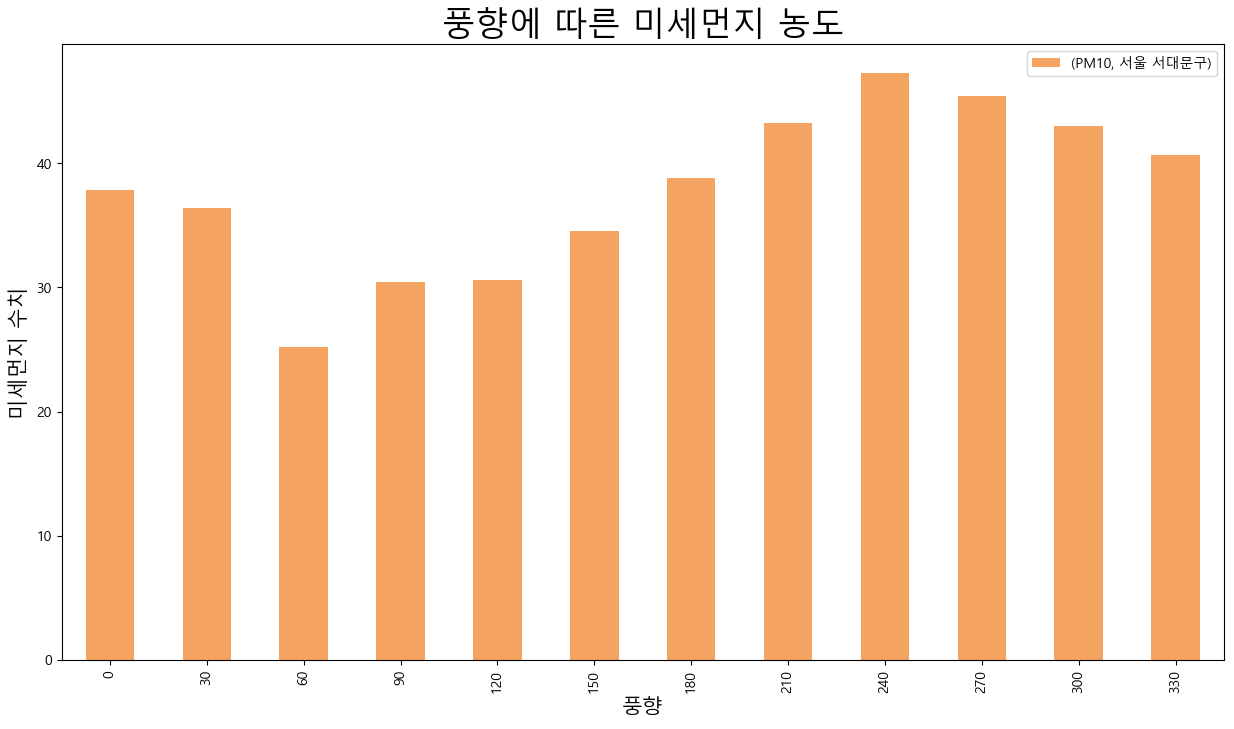

In [75]:
wd_df.plot(kind = "bar", figsize = (15, 8), width = 0.5, color = ["sandybrown"])

plt.title("풍향에 따른 미세먼지 농도", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("풍향", size = 15)

plt.show()

In [124]:
seoul_df

,"(PM10, 서울 서대문구)",강수량,기온,습도,이슬점온도,증기압,지면온도,풍속,해면기압,현지기압,풍향,month,day,hour,강수여부
일시,,,,,,,,,,,,,,,
2015-01-01 03:00:00,63.7,0.0,-7.9,35.0,-20.73,1.2,-5.03,4.3,1023.07,1011.87,300,1,1,3,False
2015-01-01 06:00:00,113.3,0.0,-9.1,35.0,-21.60,1.1,-6.27,5.3,1023.37,1012.07,300,1,1,6,False
2015-01-01 09:00:00,135.0,0.0,-9.6,40.0,-20.60,1.2,-6.60,5.2,1024.40,1013.10,270,1,1,9,False
2015-01-01 12:00:00,85.0,0.0,-7.7,36.0,-20.33,1.2,-1.00,4.7,1025.43,1014.20,300,1,1,12,False
2015-01-01 15:00:00,44.7,0.0,-5.3,33.0,-18.93,1.4,0.63,5.4,1024.17,1013.07,300,1,1,15,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-19 09:00:00,18.0,0.0,18.8,78.0,14.77,16.8,21.63,1.0,1016.30,1006.30,90,5,19,9,False
2024-05-19 12:00:00,17.0,0.0,24.0,55.0,14.30,16.3,33.70,1.8,1015.27,1005.43,240,5,19,12,False
2024-05-19 15:00:00,18.3,0.0,26.9,38.0,11.13,13.4,38.47,2.9,1013.43,1003.73,270,5,19,15,False


#### 프로토타입 테스트 당시의 MSE값 시각화

In [129]:
# 프로토타입 테스트 당시의 MSE값
step_test = [
    [322, 314, 308],
    [207, 226, 183],
    [33, 49, 32],
    [20, 41, 53],
    [20, 13, 38],
    [31, 24, 35],
    [20, 20 ,29],
    [34, 21, 14],
    [13, 26, 26],
    [17, 16, 22],
    [9, 8, 10],
    [14, 9, 13],
    [12, 8, 8],
    [16, 21, 13]
]

In [132]:
step_df = pd.DataFrame(step_test)

In [136]:
step_df.index = range(4, 60, 4)

In [138]:
steps = step_df.mean(axis = 1)

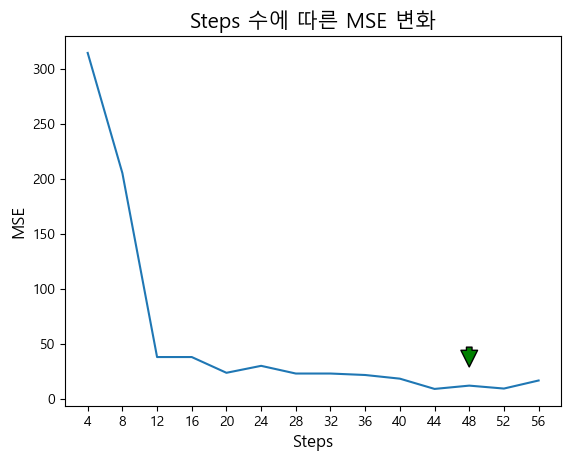

In [161]:
plt.plot(steps)
plt.title("Steps 수에 따른 MSE 변화", size = 15)
plt.xlabel("Steps", size = 12)
plt.xticks(np.arange(4, 60, 4), size=10)

# 강조 지점 (x=48)
highlight_x = 48
highlight_color = 'green'

plt.annotate('', xy=(highlight_x, steps[12] - 10), xytext=(highlight_x, steps[12] + 10),
            arrowprops=dict(facecolor=highlight_color, shrink=0.05))

plt.ylabel("MSE", size = 12)
plt.show()

## 날짜에 따른 미세먼지 추세 분석

In [193]:
# 서울의 미세먼지 값만 있는 데이터프레임 생성
seoul_dust = pm10_df.iloc[:, 4]

In [197]:
# 인덱스값 datetime 타입으로 변환
seoul_dust.index = seoul_dust.index.map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [200]:
seoul_dust = pd.DataFrame(seoul_dust)

In [204]:
weekday = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]

In [208]:
# 연 월 요일 시간 피처 생성
seoul_dust["year"] = seoul_dust.index.map(lambda x: x.year)
seoul_dust["month"] = seoul_dust.index.map(lambda x: x.month)
seoul_dust["weekday"] = seoul_dust.index.map(lambda x: weekday[x.weekday()])
seoul_dust["hour"] = seoul_dust.index.map(lambda x: x.hour)

In [214]:
seoul_dust.columns = ["PM10", "Year", "Month", "Weekday", "Hour"]

### 시간에 따른 미세먼지 분석

In [234]:
hour_df = seoul_dust.groupby("Hour", axis = 0).mean(numeric_only = True).iloc[:, 0]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\1785128067.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  hour_df = seoul_dust.groupby("Hour", axis = 0).mean(numeric_only = True).iloc[:, 0]


In [235]:
hour_df

Hour
0     39.054009
3     36.752654
6     35.215028
9     36.809785
12    40.713992
15    40.972297
18    41.465403
21    40.044934
Name: PM10, dtype: float64

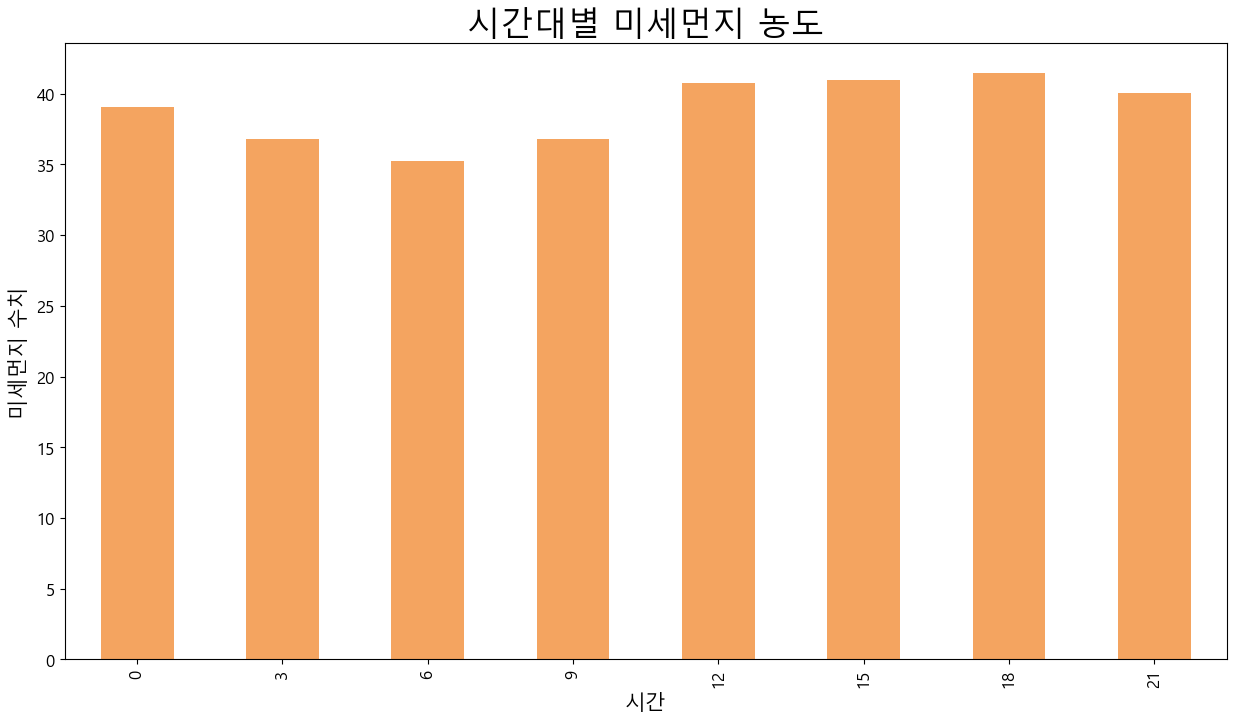

In [274]:
hour_df.plot(kind = "bar", figsize = (15, 8), width = 0.5, color = ["sandybrown"])

plt.title("시간대별 미세먼지 농도", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("시간", size = 15)
plt.yticks(size = 12)
plt.xticks(size = 12)

plt.show()

### 요일에 따른 미세먼지 분석

In [230]:
weekday_df = seoul_dust.groupby("Weekday", axis = 0).mean().iloc[:, 0]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\1994721454.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  weekday_df = seoul_dust.groupby("Weekday", axis = 0).mean().iloc[:, 0]


In [231]:
weekday_df

Weekday
FRI    39.481183
MON    39.399058
SAT    40.272827
SUN    37.450117
THU    38.148818
TUE    38.665024
WED    38.732575
Name: PM10, dtype: float64

In [232]:
weekday_df = weekday_df[[1, 5, 6, 4, 0, 2, 3]]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\3312708364.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekday_df = weekday_df[[1, 5, 6, 4, 0, 2, 3]]


In [233]:
weekday_df

Weekday
MON    39.399058
TUE    38.665024
WED    38.732575
THU    38.148818
FRI    39.481183
SAT    40.272827
SUN    37.450117
Name: PM10, dtype: float64

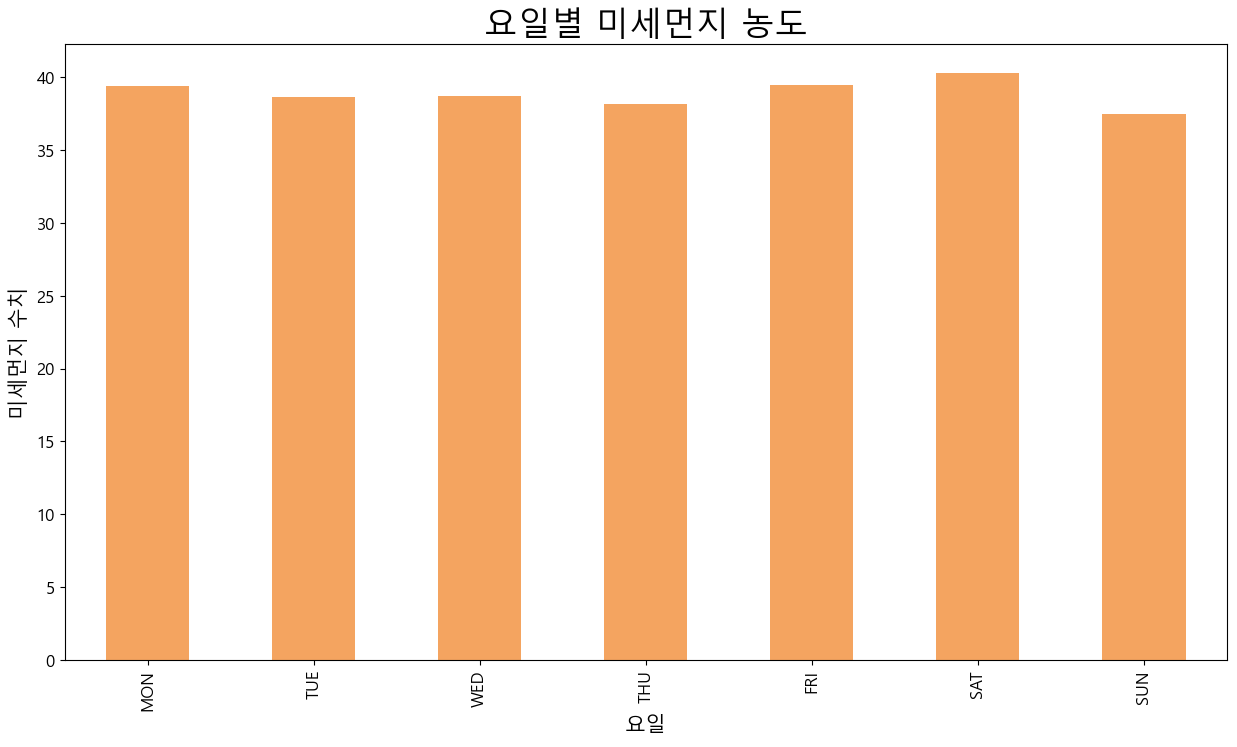

In [275]:
weekday_df.plot(kind = "bar", figsize = (15, 8), width = 0.5, color = ["sandybrown"])

plt.title("요일별 미세먼지 농도", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("요일", size = 15)
plt.yticks(size = 12)
plt.xticks(size = 12)

plt.show()

### 월별 미세먼지 분석

In [241]:
month_df = seoul_dust.groupby("Month", axis = 0).mean(numeric_only = True).iloc[:, 0]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\209653793.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  month_df = seoul_dust.groupby("Month", axis = 0).mean(numeric_only = True).iloc[:, 0]


In [242]:
month_df

Month
1     47.052185
2     48.465419
3     58.461316
4     50.946491
5     46.990482
6     33.451508
7     24.001394
8     21.843635
9     21.647601
10    29.159424
11    38.892360
12    40.708314
Name: PM10, dtype: float64

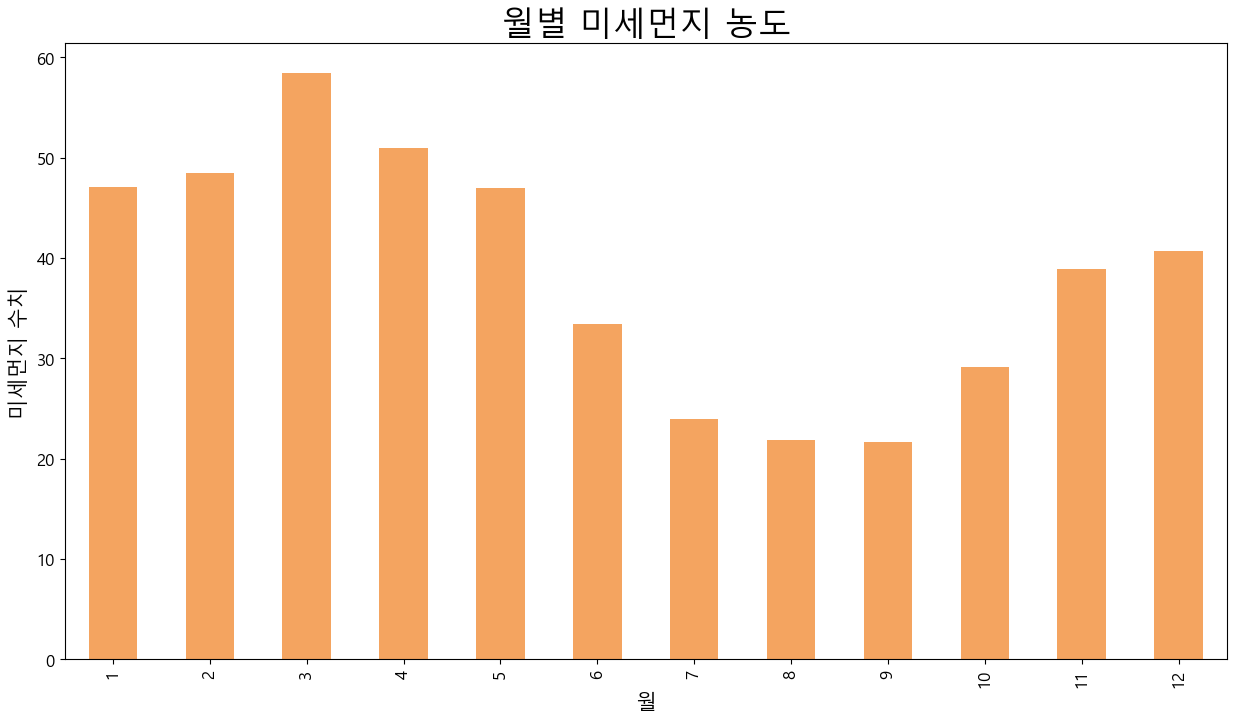

In [276]:
month_df.plot(kind = "bar", figsize = (15, 8), width = 0.5, color = ["sandybrown"])

plt.title("월별 미세먼지 농도", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("월", size = 15)
plt.yticks(size = 12)
plt.xticks(size = 12)

plt.show()

### 미세먼지 변화 추이

In [246]:
yearmonth_df = seoul_dust.groupby(["Year", "Month"], axis = 0).mean(numeric_only = True).iloc[:, 0]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\3289330543.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  yearmonth_df = seoul_dust.groupby(["Year", "Month"], axis = 0).mean(numeric_only = True).iloc[:, 0]


In [247]:
year_df = seoul_dust.groupby("Year", axis = 0).mean(numeric_only = True).iloc[:, 0]

C:\Users\ITSC\AppData\Local\Temp\ipykernel_10052\1475714588.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  year_df = seoul_dust.groupby("Year", axis = 0).mean(numeric_only = True).iloc[:, 0]


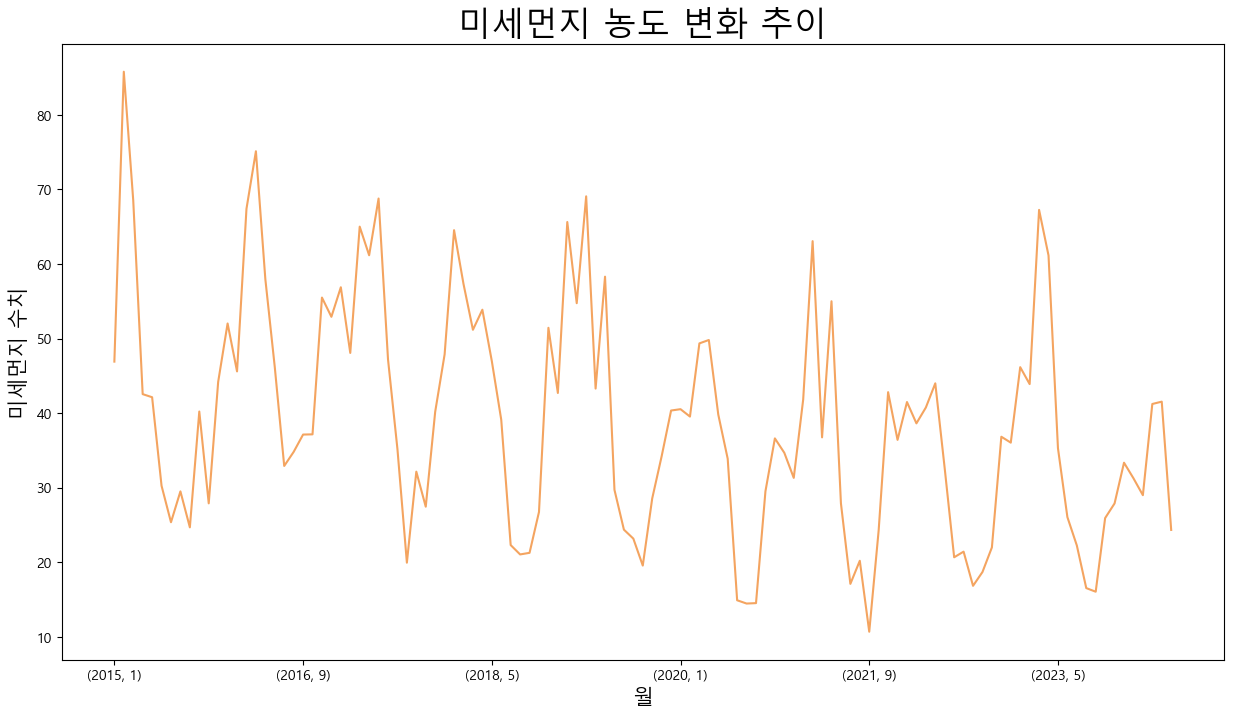

In [262]:
# 연/월 별로 미세먼지 농도 평균 시각화
yearmonth_df.plot(kind = "line", figsize = (15, 8), color = ["sandybrown"])

plt.title("미세먼지 농도 변화 추이", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("월", size = 15)

plt.show()

- 계절간의 변동은 크게 눈에 띄지만 연간 변화를 나타내기엔 아쉬움

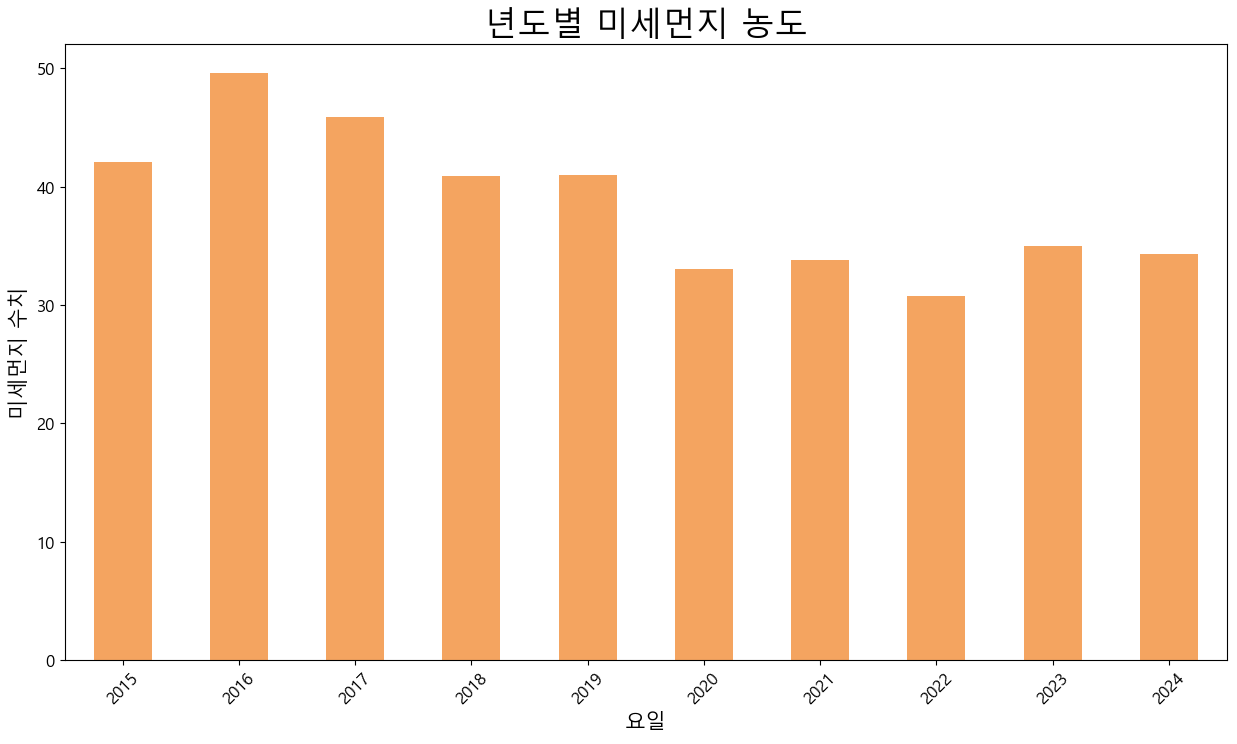

In [278]:
# 연도별 미세먼지 평균 농도 시각화
year_df.plot(kind = "bar", figsize = (15, 8), width = 0.5, color = ["sandybrown"])

plt.title("년도별 미세먼지 농도", size = 24)
plt.ylabel("미세먼지 수치", size = 15)
plt.xlabel("요일", size = 15)
plt.yticks(size = 12)
plt.xticks(size = 12, rotation = 45)

plt.show()